In [6]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [8]:
base_path = '/content/drive/My Drive/AIML/Corona_NLP'
train_data_path = os.path.join(base_path,'Corona_NLP_train.csv')
test_data_path = os.path.join(base_path,'Corona_NLP_test.csv')
glove_file_path  = '/content/drive/MyDrive/AIML/Corona_NLP/glove.6B.200d.txt'

In [64]:
train_data = pd.read_csv(train_data_path,encoding='latin1')

In [65]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [66]:
train_data.drop(columns=['UserName','ScreenName','Location','TweetAt'],inplace=True)

In [67]:
train_data['Tween_len'] = train_data.OriginalTweet.str.len()

In [68]:
train_data.head()

,OriginalTweet,Sentiment,Tween_len
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,advice Talk to your neighbours family to excha...,Positive,237
2,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,My food stock is not the only one which is emp...,Positive,306
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


In [69]:
train_data.OriginalTweet[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [70]:
train_data.shape

(41157, 3)

In [71]:
train_data.isna().sum()

OriginalTweet    0
Sentiment        0
Tween_len        0
dtype: int64

In [72]:
train_data.OriginalTweet[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [73]:
train_data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [74]:
train_data.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


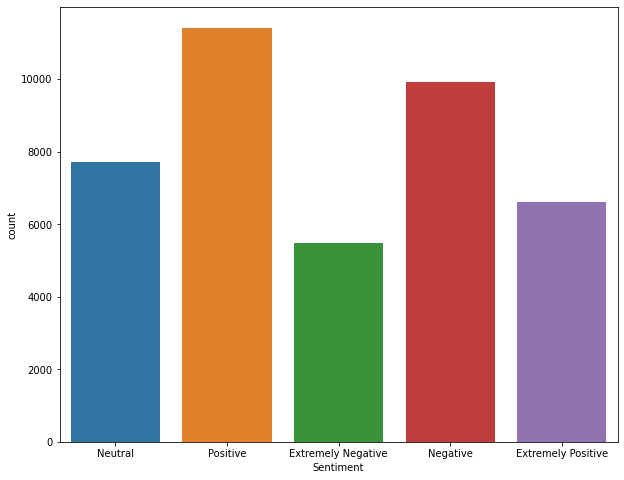

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(train_data.Sentiment)

In [76]:
sentiment_replace_dict = {'Positive':0,'Negative':1,'Neutral':2,'Extremely Positive':0,'Extremely Negative':1}
train_data.replace({'Sentiment':sentiment_replace_dict},inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


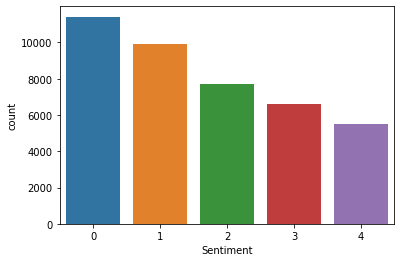

In [42]:
sns.countplot(train_data.Sentiment)

In [43]:
max_features = 100000
maxlen = 50
embedding_size = 200

In [44]:
from tensorflow.keras.preprocessing.text import  Tokenizer
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re,unicodedata


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [46]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [47]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
      pattern_ = '[^a-zA-z\s]'
      new_word = re.sub(pattern_, '', word)
      if new_word != '':
        new_words.append(new_word)
    return new_words


In [48]:
"""Remove urls from samples"""
def remove_urls(sample):
  urlPattern = '\s*https?:\/\/.*[\r\n]*'
  sample =  re.sub(urlPattern,'',sample,flags=re.MULTILINE)
  return sample

In [49]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    return words

In [50]:
def clean_text(df):
  data =df.copy()

  url_removed_data = [remove_urls(sample) for sample in data['OriginalTweet'].values]

  final_senteance = []
  lemmatizer = nltk.stem.WordNetLemmatizer()
  stop_words = stopwords.words('english')
  for sentence in url_removed_data:
    word_token = word_tokenize(sentence)
    normalized_words = normalize(word_token)
    
    filtered_sentence_ = []
    filtered_sentence = ' '
    for w in normalized_words:  
        if w not in stop_words:  
          lemmatized_word = lemmatizer.lemmatize(w)
          filtered_sentence_.append(lemmatized_word)
    final_sentence = filtered_sentence.join(filtered_sentence_)
    final_senteance.append(final_sentence)
  data['OriginalTweet_cleaned'] = final_senteance

  return data

In [51]:
cleaned_data = clean_text(train_data)

In [52]:
print(cleaned_data.OriginalTweet[2])
print(cleaned_data.OriginalTweet_cleaned[2])

Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak


In [165]:
cleaned_data['celened_tweet_len'] = cleaned_data.OriginalTweet_cleaned.str.len()
cleaned_data.head()

,OriginalTweet,Sentiment,Tween_len,OriginalTweet_cleaned,celened_tweet_len
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,111,menyrbie phil_gahan chrisitv,28
1,advice Talk to your neighbours family to excha...,0,237,advice talk neighbour family exchange phone nu...,185
2,Coronavirus Australia: Woolworths to give elde...,0,131,coronavirus australia woolworth give elderly d...,97
3,My food stock is not the only one which is emp...,0,306,food stock one empty please nt panic enough fo...,171
4,"Me, ready to go at supermarket during the #COV...",1,310,ready go supermarket covid outbreak paranoid f...,184


In [166]:
final_df = cleaned_data[cleaned_data['celened_tweet_len'] >1 ]

In [167]:
final_df.shape,cleaned_data.shape

((41067, 5), (41157, 5))

In [168]:
def prepareSequences(df):
  data = df.copy()
  tokenizer = Tokenizer(num_words=max_features,split=' ')
  tokenizer.fit_on_texts(data['OriginalTweet_cleaned'].values)
  sequences = tokenizer.texts_to_sequences(data['OriginalTweet_cleaned'].values)
  return (sequences,tokenizer)

In [169]:
sequence_data,tokenizer = prepareSequences(final_df)

In [170]:
print(sequence_data[0])

[20394, 6136, 20395, 11361]


In [171]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
after_padding_sequence = pad_sequences(sequence_data,maxlen=maxlen,padding='post',truncating='post')

In [172]:
after_padding_sequence[0]

array([20394,  6136, 20395, 11361,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [173]:
num_words = len(tokenizer.word_index)+1
num_words

52443

In [174]:
""" Prepare embeding matrix using glove 200"""

embeddings = {}
for  w in open(glove_file_path):
  word  = w.split(" ")[0]
  emdb = w.split(" ")[1:]
  emdb = np.asarray(emdb,dtype='float32')
  embeddings[word] = emdb

embedding_matrx = np.zeros((num_words,embedding_size))
for word,i in tokenizer.word_index.items():
  if i < num_words:
    embdg_vector = embeddings.get(word)
    if embdg_vector is not None:
      embedding_matrx[i] = embdg_vector

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers import Embedding,Dense,Bidirectional,LSTM, Dropout,SeparableConv1D,Flatten
from tensorflow.keras.utils import  plot_model
import tensorflow

In [176]:
embedding_size

200

In [177]:
from sklearn.model_selection import train_test_split
from  tensorflow.keras.utils import to_categorical

y =  final_df.Sentiment.values
y = to_categorical(y,dtype='int32')



In [178]:
X_train,X_test,y_train,y_test = train_test_split(after_padding_sequence,y,test_size=0.2,random_state=42)

In [179]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(32853, 50) (32853, 3)
(8214, 50) (8214, 3)


In [187]:

model = Sequential()
model.add(Embedding(embedding_matrx.shape[0],embedding_size,input_length=maxlen))
model.add(Bidirectional(LSTM(196,dropout=0.2,return_sequences=True)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_test.shape[1],activation='softmax'))

100000 200 50 (52443, 200)


In [188]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 200)           10488600  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 392)           622496    
_________________________________________________________________
flatten_4 (Flatten)          (None, 19600)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1960100   
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 303       
Total params: 13,071,499
Trainable params: 13,071,499
Non-trainable params: 0
__________________________________________

In [189]:
model.layers[0].set_weights([embedding_matrx])
model.layers[0].trainable  = False

In [190]:
model.compile(optimizer='adam',loss=tensorflow.losses.categorical_crossentropy,metrics=['accuracy'])

In [191]:
epochs = 50
batch_size = 32
history = model.fit(x=X_train,y=y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



Epoch 1/50
719/719 [==============================] - 12s 13ms/step - loss: 0.8435 - accuracy: 0.6176 - val_loss: 0.7043 - val_accuracy: 0.7020
Epoch 2/50
719/719 [==============================] - 9s 13ms/step - loss: 0.6700 - accuracy: 0.7211 - val_loss: 0.6630 - val_accuracy: 0.7261
Epoch 3/50
719/719 [==============================] - 9s 12ms/step - loss: 0.5563 - accuracy: 0.7751 - val_loss: 0.6495 - val_accuracy: 0.7392
Epoch 4/50
719/719 [==============================] - 9s 12ms/step - loss: 0.4332 - accuracy: 0.8251 - val_loss: 0.6702 - val_accuracy: 0.7509
Epoch 5/50
719/719 [==============================] - 9s 12ms/step - loss: 0.3079 - accuracy: 0.8812 - val_loss: 0.7960 - val_accuracy: 0.7494
Epoch 6/50
719/719 [==============================] - 9s 12ms/step - loss: 0.2053 - accuracy: 0.9226 - val_loss: 0.8650 - val_accuracy: 0.7359


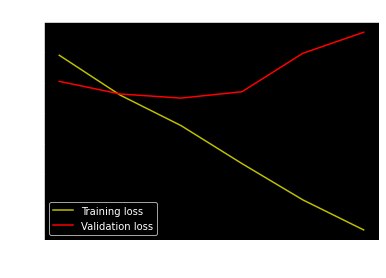

In [192]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

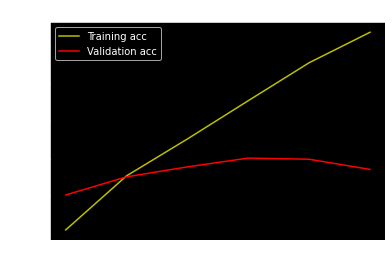

In [193]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [194]:
model.evaluate(X_test,y_test)

257/257 [==============================] - 2s 6ms/step - loss: 0.8567 - accuracy: 0.7350


[0.8567007184028625, 0.7349646687507629]

In [195]:
# Read testing data
test_data = pd.read_csv(test_data_path)
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [196]:
# Clean testing data
test_cleaned_data = clean_text(test_data)
test_cleaned_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,OriginalTweet_cleaned
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,could nt find hand sanitizer fred meyer turned...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,find protect loved one coronavirus
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hit newyork city anxious shopper ...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...


In [197]:
labels = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

In [198]:
test_seq = tokenizer.texts_to_sequences(test_cleaned_data['OriginalTweet_cleaned'])
padded =  pad_sequences(test_seq,maxlen=maxlen,padding='post',truncating='post')
pred = model.predict(padded)
# print(pred)
results_lits = {}
for index in range(pred.shape[0]):
  # print(index)
  pred_ = pred[index]
  key =  f"{test_cleaned_data.iloc[index]['ScreenName'] } _  {test_cleaned_data.iloc[index]['Sentiment'] }"
  results_lits[key] = labels[np.argmax(pred_)]


In [199]:
results_lits

{'44953 _  Extremely Negative': 'Neutral',
 '44954 _  Positive': 'Positive',
 '44955 _  Extremely Positive': 'Positive',
 '44956 _  Negative': 'Negative',
 '44957 _  Neutral': 'Positive',
 '44958 _  Neutral': 'Neutral',
 '44959 _  Positive': 'Positive',
 '44960 _  Neutral': 'Positive',
 '44961 _  Extremely Negative': 'Negative',
 '44962 _  Extremely Positive': 'Positive',
 '44963 _  Positive': 'Positive',
 '44964 _  Extremely Negative': 'Negative',
 '44965 _  Extremely Negative': 'Negative',
 '44966 _  Extremely Positive': 'Positive',
 '44967 _  Positive': 'Neutral',
 '44968 _  Extremely Negative': 'Positive',
 '44969 _  Extremely Positive': 'Positive',
 '44970 _  Neutral': 'Positive',
 '44971 _  Positive': 'Negative',
 '44972 _  Extremely Positive': 'Positive',
 '44973 _  Negative': 'Negative',
 '44974 _  Extremely Positive': 'Positive',
 '44975 _  Extremely Positive': 'Positive',
 '44976 _  Extremely Positive': 'Positive',
 '44977 _  Extremely Negative': 'Negative',
 '44978 _  Positi

In [200]:
results_lits = {}
def predict_sentiment(text,UserName,sentiment):
  test_seq = tokenizer.texts_to_sequences(text)
  padded =  pad_sequences(test_seq,maxlen=maxlen,padding='post',truncating='post')
  if padded.shape[0] > 0:
    pred = model.predict(padded)
    # print(pred)
    key =  f"{UserName} _  {sentiment}"
    results_lits[key] = labels[np.argmax(pred.shape[1])]

In [ ]:
for index in range(test_cleaned_data.shape[0]):
  text = test_cleaned_data.iloc[index]['OriginalTweet_cleaned']
  print(text)
  userName = test_cleaned_data.iloc[index]['UserName']
  sentiment = test_cleaned_data.iloc[index]['Sentiment'] 
  predict_sentiment(text,userName,sentiment)
  break


In [202]:
def test_clean_text(text):
  """Clean testing data and normalize data"""
  url_removed_data = remove_urls(text)
  final_senteance = []
  lemmatizer = nltk.stem.WordNetLemmatizer()
  stop_words = stopwords.words('english')
  word_token = word_tokenize(url_removed_data)
  normalized_words = normalize(word_token)
  filtered_sentence_ = []
  filtered_sentence = ' '
  for w in normalized_words:  
      if w not in stop_words:  
        lemmatized_word = lemmatizer.lemmatize(w)
        filtered_sentence_.append(lemmatized_word)
  final_sentence = filtered_sentence.join(filtered_sentence_)
  final_senteance.append(final_sentence)
  return final_senteance

In [203]:
text = test_data['OriginalTweet'].values[0]
print(text)
text = test_clean_text(text)
# text = test_cleaned_data.iloc[0]['OriginalTweet_cleaned']
print(text)
test_seq = tokenizer.texts_to_sequences(text)
padded =  pad_sequences(test_seq,maxlen=maxlen,padding='post',truncating='post')
pred = model.predict(padded)[0]
print(labels[np.argmax(pred)])

TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1
['trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfearing shopper stock']
Neutral


****

**MultinomialNB**
*   Sentiment analysis using MultinomialNB
*   Transforming data using CountVectorizer, and TF-IDF
*   GridsearchCV for hyper-parameter tuning.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report,accuracy_score

X = cleaned_data.OriginalTweet_cleaned.values
y = cleaned_data.Sentiment.values
nb_x_train, nb_x_test, nb_y_train, nb_y_test = train_test_split(X, y, test_size=0.33, random_state=42)


text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [81]:
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring='accuracy')
clf.fit(nb_x_train, nb_y_train)
print(classification_report(nb_y_test, clf.predict(nb_x_test), digits=4))


              precision    recall  f1-score   support

           0     0.3955    0.7090    0.5078      3821
           1     0.4060    0.5145    0.4539      3300
           2     0.6954    0.3237    0.4417      2518
           3     0.6247    0.2333    0.3398      2190
           4     0.6613    0.2116    0.3207      1753

    accuracy                         0.4494     13582
   macro avg     0.5566    0.3984    0.4128     13582
weighted avg     0.5249    0.4494    0.4312     13582



In [82]:
accuracy_score(nb_y_test, clf.predict(nb_x_test))

0.44941834781328227